In [1]:
#-----------------------------------------------------------------------
# Librerías y algunas variables
#-----------------------------------------------------------------------
import mne                                                              # pip install mne
mne.set_log_level('WARNING')                                            # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb      
import random                                              # Por ahora lo voy a usar para cambiar los nombres de las columnas

import a_funciones as a_fun  

color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'

#-----------------------------------------------------------------------
# Modificaciones para alterar DrugSignal en fase
#-----------------------------------------------------------------------
#v_min = 50
#v_max = 500
#v_aleatorio = np.random.randint(v_min, v_max, (1, 10)) 
# v_aleatorio = [-5,1,5,0,5,0,5,0] # Vector fijo para testing
vector_desfase = [100, 200, 300, 400, 500, 600] # Vector fijo para testing
print(f'vector_desfase: ',vector_desfase)
#-----------------------------------------------------------------------
# Modificaciones para alterar DrugSignal en amplitud
#-----------------------------------------------------------------------
v_min = erptemplate1.min()*3
v_max = erptemplate1.max()*3
vector_amp = np.random.uniform(v_min, v_max, (1, 8)) 
print(f'vector_amp: ',vector_amp)
#-----------------------------------------------------------------------
# Función DrugSignal
#-----------------------------------------------------------------------
def DrugSignal(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    signal_amp=signal
    signal_fase=signal
    for j in range(0,7):
        desfase = random.choice(vector_desfase)
        amp = random.choice(vector_amp)
        for i in range(0,4200):
            if (t_flash[i,3]==2):
                #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)    ORIGINAL
                signal_amp[t_flash[i,0]-1:t_flash[i,0]+250-1,j] += (erptemplate1[:,j]*amp)                                                                                 
                signal_fase[t_flash[i,0]-desfase:t_flash[i,0]+250-desfase,j] += (erptemplate1[:,j]*100)                                                                                 
    return signal_amp, signal_fase

#-----------------------------------------------------------------------
# Carga de archivos para proceso de señales
#-----------------------------------------------------------------------
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat')
routput = mat['routput']

erptemplate1 = routput[0][7][0][1][0][0][0][7]                          # In this ERPTemplate, there are two different template signals that are good.
erptemplate2 = routput[0][7][0][1][0][0][0][0] 

erptemplate1 = np.delete( erptemplate1, range(0,256,43),0)              # The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate2 = np.delete( erptemplate2, range(0,256,43),0)

p300subject25 = scipy.io.loadmat('./dataset/p300-subject-25.mat')       # Now load the basal EEG stream

t_flash = p300subject25['data'][0][0][4]                                # Flash matrix
df_t_flash = a_fun.to_df(t_flash)

signal = p300subject25['data'][0][0][0]    


print("-----------------------------------------")   
print("signal:")   
print("Tipo : ", type(signal))
print("Tamaño : ", len(signal))
print("Forma de signal:", signal.shape)
print("Tipo de datos de signal:", signal.dtype)
print("----------------------")   
print("Lo que hay en un campo : ", signal[0])
print("Tipo de lo que hay en un campo : ", type(signal[0]))
print("Tamaño de lo que hay en un campo : ", len(signal[0]))
print("Forma del signal[0]:", signal[0].shape)
print("Tipo de datos de signal[0]:", signal[0].dtype)
print("----------------------")   
'''
print("Lo que hay en un campo : ", signal[,0])
print("Tipo de lo que hay en un campo : ", type(signal[,0]))
print("Tamaño de lo que hay en un campo : ", len(signal[,0]))
print("Forma del signal[,0]:", signal[,0].shape)
print("Tipo de datos de signal[,0]:", signal[,0].dtype)
print("----------------------")   
'''

signal = DrugSignal(signal, t_flash)
df_signal = a_fun.to_df(signal)
df_signal


v_aleatorio:  [100, 200, 300, 400, 500, 600]
-----------------------------------------
signal:
Tipo :  <class 'numpy.ndarray'>
Tamaño :  358400
Forma de signal: (358400, 8)
Tipo de datos de signal: float64
----------------------
Lo que hay en un campo :  [-25.84117126 -10.55760288  -6.21198225 -15.84391022 -13.55899048
  20.12263489 -11.94608021   6.2656517 ]
Tipo de lo que hay en un campo :  <class 'numpy.ndarray'>
Tamaño de lo que hay en un campo :  8
Forma del signal[0]: (8,)
Tipo de datos de signal[0]: float64
----------------------


,0,1,2,3,4,5,6,7,sample
0,-25.841171,-10.557603,-6.211982,-15.843910,-13.558990,20.122635,-11.946080,6.265652,0
1,-34.338673,-18.944792,-17.603668,-26.940290,-23.392313,-17.507841,-31.759108,-16.000412,1
2,-37.689247,-19.064447,-18.308565,-25.747719,-21.724098,-18.072618,-28.811285,-11.629916,2
3,-24.009695,-6.639306,-11.457250,-11.021503,-1.366220,-5.843951,-10.881763,3.213532,3
4,-14.699684,-0.977608,-3.606690,1.438218,18.299120,10.070486,9.120290,27.182615,4
...,...,...,...,...,...,...,...,...,...
358395,8.348876,-1.448800,-7.263316,-10.008823,0.042449,-10.695869,-3.517254,-14.230025,358395
358396,10.000939,-1.899947,-9.188922,-9.475272,6.371345,-23.403809,3.944809,-13.214551,358396
358397,8.231050,-6.893495,-10.014253,-9.674665,6.783853,-25.591261,4.212073,-12.678520,358397
358398,6.005248,-10.328425,-9.807632,-10.479656,4.436954,-17.936047,-0.169820,-10.185187,358398


A continuación, grafico las dos señales a trabajar: signal y flash.  

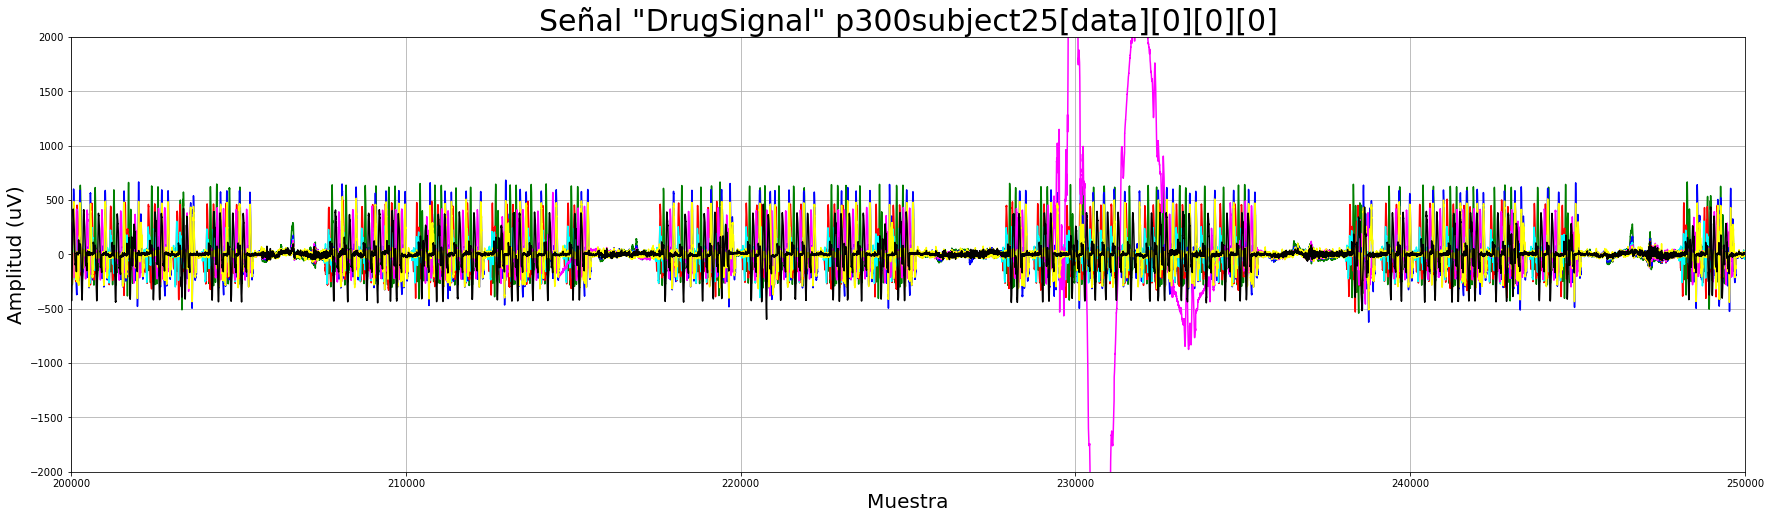

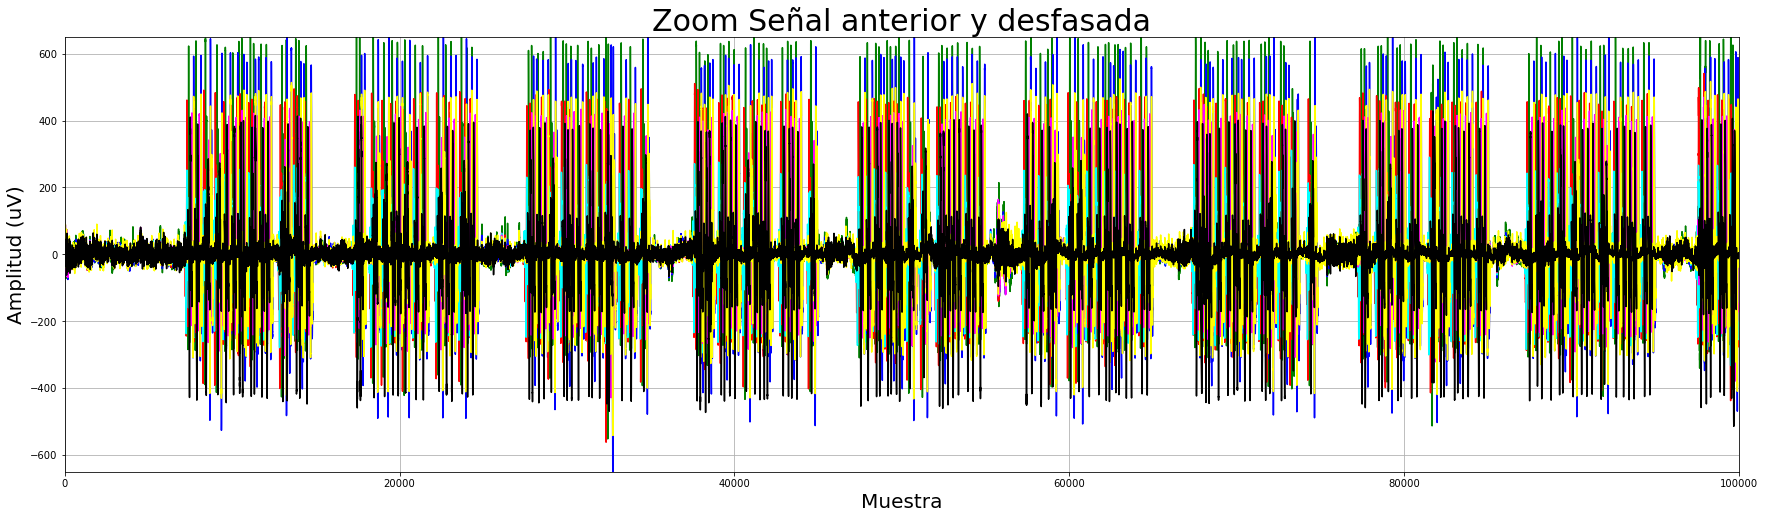

"\nplt.figure(figsize=(30,8))\naxes = plt.gca()\nplt.plot(df_t_flash['sample'], df_t_flash[0])\naxes.set_title('Señal t_flash[0]: Incremental'), axes.title.set_size(30)\naxes.set_xlabel(xlabel), axes.set_ylabel(ylabel)\naxes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)\nplt.grid(), plt.show()\n\nplt.figure(figsize=(30,8))\naxes = plt.gca()\nplt.plot(df_t_flash['sample'], df_t_flash[3])\naxes.set_title('Señal t_flash[3] completa'), axes.title.set_size(30)\naxes.set_xlabel(xlabel), axes.set_ylabel(ylabel)\naxes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)\nplt.grid(), plt.show()\n\nplt.figure(figsize=(30,8))\naxes = plt.gca()\nplt.plot(df_t_flash['sample'], df_t_flash[3])\naxes.set_title('Zoom señal t_flash[3]'), axes.title.set_size(30)\naxes.set_xlabel(xlabel), axes.set_ylabel(ylabel)\naxes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)\nplt.xlim([0,100]), plt.ylim([0.9,2.1])\nplt.grid(), plt.show()\n"

In [5]:
plt.figure(figsize=(30,8))                                     
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('Señal "DrugSignal" p300subject25[data][0][0][0]'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([200000,250000]), plt.ylim([-2000,2000])
#plt.savefig("./a_images/DrugSignal_p300subject25[data][0][0][0].jpg")
plt.grid(), plt.show()


plt.figure(figsize=(30,8))                           
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('Zoom Señal anterior y desfasada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.xlim([8550,8950]), plt.ylim([-650,650])
plt.xlim([0,100000]), plt.ylim([-650,650])
#plt.savefig("./a_images/DrguSignal_p300subject25[data][0][0][0]_ERPTemplatex100_zoom.jpg")
plt.grid(), plt.show()

'''
plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[0])
axes.set_title('Señal t_flash[0]: Incremental'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[3])
axes.set_title('Señal t_flash[3] completa'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[3])
axes.set_title('Zoom señal t_flash[3]'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([0,100]), plt.ylim([0.9,2.1])
plt.grid(), plt.show()
'''

En la siguientes gráficas modifico el erptemplate1 multiplicándolo por 50 dentro de la función DrugSignal.  
El objetivo es visualizar en dónde afecta la señal.    

In [ ]:
plt.figure(figsize=(30,8))                                      # DrugSignal
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])                                                           
axes.set_title('DrugSignal p300subject25[data][0][0][0] + ERPTemplate amplificado'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/DrguSignal_p300subject25[data][0][0][0]_ERPTemplatex100.jpg")
#plt.xlim([7500,15500]), plt.ylim([-300,300])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))                           
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('Zoom Señal anterior y desfasada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([8550,8950]), plt.ylim([-600,800])
plt.savefig("./a_images/DrguSignal_p300subject25[data][0][0][0]_ERPTemplatex100_zoom.jpg")
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))                                      # DrugSignal
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_s2['sample'], df_s2[i], color[i])              
axes.set_title('Señal p300subject25[data][0][0][0] drogada con el ERPTemplate'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/DrguSignal2.jpg")
#plt.xlim([7500,15500]), plt.ylim([-300,300])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))                           
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_s2['sample'], df_s2[i], color[i])
axes.set_title('Zoom Señal anterior y desfasada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([228000,236000]), plt.ylim([-800,1000])
plt.savefig("./a_images/DrguSignal2_zoom.jpg")
plt.grid(), plt.show()